# Inventory management example

In [1]:
import matplotlib.pyplot as plt
from mlopt.sampling import uniform_sphere_sample
import mlopt
import pandas as pd
import cvxpy as cp
import numpy as np
import os

np.random.seed(0)

# Generate Optimizer

In [2]:
np.random.seed(1)
T = 30
M = 3.
h = 1.
c = 2.
p = 3.

# Define problem
x = cp.Variable(T+1)
u = cp.Variable(T)

# Define parameters
d = cp.Parameter(T, nonneg=True, name="d")
x_init = cp.Parameter(1, name="x_init")

# Constaints
constraints = [x[0] == x_init]
for t in range(T):
    constraints += [x[t+1] == x[t] + u[t] - d[t]]
constraints += [u >= 0, u <= M]

# Objective
cost = cp.sum(cp.maximum(h * x, -p * x)) + c * cp.sum(u)

# Define optimizer
problem = cp.Problem(cp.Minimize(cost), constraints)
m = mlopt.Optimizer(problem)

# Sample points

In [3]:
# Average request
theta_bar = np.concatenate(( 2 * np.ones(T),  # d
                            [10]              # x_init
                           ))
radius = 1


def sample_inventory(theta_bar, radius, n=100):

    # Sample points from multivariate ball
    X_d = uniform_sphere_sample(theta_bar[:-1], radius, n=n)
    X_x_init = uniform_sphere_sample([theta_bar[-1]], 3 * radius,
                                     n=n)

    df = pd.DataFrame({'d': X_d.tolist(),
                       'x_init': X_x_init.tolist()})

    return df

# Train

In [4]:
# Training and testing data
n_train = 1000
n_test = 100
theta_train = sample_inventory(theta_bar, radius, n=n_train)
theta_test = sample_inventory(theta_bar, radius, n=n_test)

# Train solver
m.train(theta_train, learner=mlopt.PYTORCH)

Use new data
Compute tight constraints for training set (n_jobs = 4)



Encoding strategies
Getting unique set of strategies
Found 4 unique strategies
No labels appearing only once
Selecting most frequent strategies
Selected 4 strategies
Discarded strategies for 0 samples (0.00 %)
Assign samples to selected strategies (n_jobs = 4)



Caching KKT solver factors for each strategy 



Using CPU with Pytorch
Split dataset in 900 training and 100 validation


/Users/sidereus/.pyenv/versions/3.8.2/envs/mlopt/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


/Users/sidereus/.pyenv/versions/3.8.2/envs/mlopt/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


[I 2020-06-08 17:59:17,856] Finished trial#0 with value: 1.3592997789382935 with parameters: {'n_layers': 15, 'dropout': 0.33713784729000734, 'batch_size': 224, 'learning_rate': 0.04135997393839887, 'max_epochs': 8, 'n_units_l0': 74, 'n_units_l1': 33, 'n_units_l2': 14, 'n_units_l3': 10, 'n_units_l4': 4, 'n_units_l5': 9, 'n_units_l6': 20, 'n_units_l7': 65, 'n_units_l8': 20, 'n_units_l9': 14, 'n_units_l10': 71, 'n_units_l11': 12, 'n_units_l12': 36, 'n_units_l13': 13, 'n_units_l14': 110}. Best is trial#0 with value: 1.3592997789382935.


[I 2020-06-08 17:59:21,254] Finished trial#1 with value: 1.3862931728363037 with parameters: {'n_layers': 3, 'dropout': 0.4914473368931056, 'batch_size': 248, 'learning_rate': 0.6389465240697493, 'max_epochs': 24, 'n_units_l0': 40, 'n_units_l1': 47, 'n_units_l2': 28}. Best is trial#0 with value: 1.3592997789382935.


[I 2020-06-08 17:59:30,745] Finished trial#2 with value: 1.3862946033477783 with parameters: {'n_layers': 12, 'dropout': 0.47786756681983356, 'batch_size': 63, 'learning_rate': 4.3196209928543466e-05, 'max_epochs': 28, 'n_units_l0': 9, 'n_units_l1': 57, 'n_units_l2': 18, 'n_units_l3': 27, 'n_units_l4': 4, 'n_units_l5': 32, 'n_units_l6': 32, 'n_units_l7': 32, 'n_units_l8': 105, 'n_units_l9': 41, 'n_units_l10': 13, 'n_units_l11': 17}. Best is trial#0 with value: 1.3592997789382935.


[I 2020-06-08 17:59:36,916] Finished trial#3 with value: 1.386293888092041 with parameters: {'n_layers': 4, 'dropout': 0.13971214014358957, 'batch_size': 89, 'learning_rate': 0.10013831806758097, 'max_epochs': 28, 'n_units_l0': 6, 'n_units_l1': 13, 'n_units_l2': 52, 'n_units_l3': 31}. Best is trial#0 with value: 1.3592997789382935.


[I 2020-06-08 17:59:39,232] Finished trial#4 with value: 1.3702614307403564 with parameters: {'n_layers': 15, 'dropout': 0.3280787081671519, 'batch_size': 116, 'learning_rate': 0.06392111585519007, 'max_epochs': 11, 'n_units_l0': 5, 'n_units_l1': 7, 'n_units_l2': 6, 'n_units_l3': 37, 'n_units_l4': 9, 'n_units_l5': 19, 'n_units_l6': 8, 'n_units_l7': 6, 'n_units_l8': 5, 'n_units_l9': 37, 'n_units_l10': 6, 'n_units_l11': 7, 'n_units_l12': 13, 'n_units_l13': 67, 'n_units_l14': 5}. Best is trial#0 with value: 1.3592997789382935.


[I 2020-06-08 17:59:39,585] Setting status of trial#5 as TrialState.PRUNED. Trial was pruned at epoch 1.


/Users/sidereus/.pyenv/versions/3.8.2/envs/mlopt/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


[I 2020-06-08 17:59:49,292] Finished trial#6 with value: 1.3424063920974731 with parameters: {'n_layers': 14, 'dropout': 0.14807862448526757, 'batch_size': 55, 'learning_rate': 0.007679999380808114, 'max_epochs': 30, 'n_units_l0': 11, 'n_units_l1': 16, 'n_units_l2': 4, 'n_units_l3': 42, 'n_units_l4': 27, 'n_units_l5': 9, 'n_units_l6': 23, 'n_units_l7': 5, 'n_units_l8': 28, 'n_units_l9': 100, 'n_units_l10': 11, 'n_units_l11': 39, 'n_units_l12': 6, 'n_units_l13': 46}. Best is trial#6 with value: 1.3424063920974731.


[I 2020-06-08 17:59:52,638] Finished trial#7 with value: 0.945102334022522 with parameters: {'n_layers': 3, 'dropout': 0.20589206571337987, 'batch_size': 206, 'learning_rate': 0.033042858368124116, 'max_epochs': 29, 'n_units_l0': 6, 'n_units_l1': 13, 'n_units_l2': 6}. Best is trial#7 with value: 0.945102334022522.


[I 2020-06-08 17:59:52,964] Setting status of trial#8 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 17:59:53,389] Setting status of trial#9 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 17:59:53,883] Setting status of trial#10 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 17:59:55,278] Setting status of trial#11 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:00,215] Finished trial#12 with value: 1.1715525388717651 with parameters: {'n_layers': 8, 'dropout': 0.1875342324807791, 'batch_size': 196, 'learning_rate': 0.009389584596130526, 'max_epochs': 25, 'n_units_l0': 9, 'n_units_l1': 101, 'n_units_l2': 4, 'n_units_l3': 66, 'n_units_l4': 32, 'n_units_l5': 4, 'n_units_l6': 4, 'n_units_l7': 12}. Best is trial#7 with value: 0.945102334022522.


[I 2020-06-08 18:00:00,545] Setting status of trial#13 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:01,144] Setting status of trial#14 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:01,808] Setting status of trial#15 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:03,456] Setting status of trial#16 as TrialState.PRUNED. Trial was pruned at epoch 7.


[I 2020-06-08 18:00:03,941] Setting status of trial#17 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:04,570] Setting status of trial#18 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:05,196] Setting status of trial#19 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:05,916] Setting status of trial#20 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:11,335] Setting status of trial#21 as TrialState.PRUNED. Trial was pruned at epoch 24.


[I 2020-06-08 18:00:12,214] Setting status of trial#22 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:12,691] Setting status of trial#23 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:13,133] Setting status of trial#24 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:13,634] Setting status of trial#25 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:19,060] Setting status of trial#26 as TrialState.PRUNED. Trial was pruned at epoch 24.


[I 2020-06-08 18:00:19,549] Setting status of trial#27 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:23,271] Finished trial#28 with value: 0.9746919870376587 with parameters: {'n_layers': 4, 'dropout': 0.29372672783328446, 'batch_size': 124, 'learning_rate': 0.006540812728463859, 'max_epochs': 20, 'n_units_l0': 19, 'n_units_l1': 85, 'n_units_l2': 5, 'n_units_l3': 7}. Best is trial#7 with value: 0.945102334022522.


[I 2020-06-08 18:00:23,615] Setting status of trial#29 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:24,147] Setting status of trial#30 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:28,231] Finished trial#31 with value: 0.9605427980422974 with parameters: {'n_layers': 5, 'dropout': 0.3856976921847669, 'batch_size': 61, 'learning_rate': 0.008368949101297634, 'max_epochs': 22, 'n_units_l0': 18, 'n_units_l1': 35, 'n_units_l2': 6, 'n_units_l3': 7, 'n_units_l4': 7}. Best is trial#7 with value: 0.945102334022522.


[I 2020-06-08 18:00:28,547] Setting status of trial#32 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:30,216] Setting status of trial#33 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:00:31,397] Setting status of trial#34 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:00:31,820] Setting status of trial#35 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:32,261] Setting status of trial#36 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:33,889] Setting status of trial#37 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:00:34,451] Setting status of trial#38 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:34,904] Setting status of trial#39 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:35,900] Finished trial#40 with value: 1.3862931728363037 with parameters: {'n_layers': 6, 'dropout': 0.4017745774741332, 'batch_size': 132, 'learning_rate': 0.07341115499098273, 'max_epochs': 5, 'n_units_l0': 14, 'n_units_l1': 116, 'n_units_l2': 7, 'n_units_l3': 24, 'n_units_l4': 7, 'n_units_l5': 44}. Best is trial#7 with value: 0.945102334022522.


[I 2020-06-08 18:00:37,915] Setting status of trial#41 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:00:42,290] Finished trial#42 with value: 0.5292564034461975 with parameters: {'n_layers': 5, 'dropout': 0.13404478114458002, 'batch_size': 49, 'learning_rate': 0.002795687839992207, 'max_epochs': 22, 'n_units_l0': 8, 'n_units_l1': 15, 'n_units_l2': 4, 'n_units_l3': 55, 'n_units_l4': 17}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:00:42,648] Setting status of trial#43 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:43,298] Setting status of trial#44 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:43,936] Setting status of trial#45 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:44,752] Setting status of trial#46 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:45,271] Setting status of trial#47 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:46,328] Setting status of trial#48 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:47,226] Setting status of trial#49 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:48,679] Setting status of trial#50 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:00:50,654] Setting status of trial#51 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:00:56,750] Finished trial#52 with value: 0.6166943907737732 with parameters: {'n_layers': 3, 'dropout': 0.19157951584071664, 'batch_size': 45, 'learning_rate': 0.002877482890336848, 'max_epochs': 29, 'n_units_l0': 10, 'n_units_l1': 22, 'n_units_l2': 4}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:00:57,168] Setting status of trial#53 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:57,816] Setting status of trial#54 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:58,783] Setting status of trial#55 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:00:59,630] Setting status of trial#56 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:00,150] Setting status of trial#57 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:00,610] Setting status of trial#58 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:01,175] Setting status of trial#59 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:01,664] Setting status of trial#60 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:02,524] Setting status of trial#61 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:03,278] Setting status of trial#62 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:04,154] Setting status of trial#63 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:04,557] Setting status of trial#64 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:05,111] Setting status of trial#65 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:05,613] Setting status of trial#66 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:08,390] Setting status of trial#67 as TrialState.PRUNED. Trial was pruned at epoch 12.


[I 2020-06-08 18:01:08,930] Setting status of trial#68 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:11,054] Setting status of trial#69 as TrialState.PRUNED. Trial was pruned at epoch 9.


[I 2020-06-08 18:01:11,655] Setting status of trial#70 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:12,441] Setting status of trial#71 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:13,091] Setting status of trial#72 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:14,967] Setting status of trial#73 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:01:16,980] Setting status of trial#74 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:01:17,820] Finished trial#75 with value: 1.3464285135269165 with parameters: {'n_layers': 4, 'dropout': 0.3585968812982412, 'batch_size': 228, 'learning_rate': 0.34091251395927114, 'max_epochs': 5, 'n_units_l0': 32, 'n_units_l1': 5, 'n_units_l2': 4, 'n_units_l3': 4}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:01:18,130] Setting status of trial#76 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:18,538] Setting status of trial#77 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:18,970] Setting status of trial#78 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:19,533] Setting status of trial#79 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:19,905] Setting status of trial#80 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:20,367] Setting status of trial#81 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:20,840] Setting status of trial#82 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:21,719] Finished trial#83 with value: 1.3465920686721802 with parameters: {'n_layers': 4, 'dropout': 0.3773742015431437, 'batch_size': 229, 'learning_rate': 0.059192493394324364, 'max_epochs': 6, 'n_units_l0': 8, 'n_units_l1': 23, 'n_units_l2': 4, 'n_units_l3': 6}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:01:22,386] Finished trial#84 with value: 1.3464993238449097 with parameters: {'n_layers': 4, 'dropout': 0.3752949972411983, 'batch_size': 242, 'learning_rate': 0.05754458047519472, 'max_epochs': 6, 'n_units_l0': 8, 'n_units_l1': 19, 'n_units_l2': 4, 'n_units_l3': 4}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:01:22,630] Setting status of trial#85 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:23,098] Setting status of trial#86 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:23,614] Setting status of trial#87 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:24,863] Setting status of trial#88 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:01:25,301] Setting status of trial#89 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:25,691] Setting status of trial#90 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:26,382] Setting status of trial#91 as TrialState.PRUNED. Trial was pruned at epoch 4.


[I 2020-06-08 18:01:26,808] Setting status of trial#92 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:27,244] Setting status of trial#93 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:28,370] Setting status of trial#94 as TrialState.PRUNED. Trial was pruned at epoch 8.


[I 2020-06-08 18:01:28,817] Setting status of trial#95 as TrialState.PRUNED. Trial was pruned at epoch 1.


[I 2020-06-08 18:01:30,166] Finished trial#96 with value: 0.9812614917755127 with parameters: {'n_layers': 5, 'dropout': 0.31998307524361214, 'batch_size': 61, 'learning_rate': 0.004254716146955855, 'max_epochs': 7, 'n_units_l0': 4, 'n_units_l1': 18, 'n_units_l2': 5, 'n_units_l3': 4, 'n_units_l4': 49}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:01:31,780] Finished trial#97 with value: 1.3391575813293457 with parameters: {'n_layers': 5, 'dropout': 0.310566081342252, 'batch_size': 62, 'learning_rate': 0.004396998691514464, 'max_epochs': 7, 'n_units_l0': 5, 'n_units_l1': 18, 'n_units_l2': 4, 'n_units_l3': 5, 'n_units_l4': 50}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:01:33,101] Finished trial#98 with value: 1.3379583358764648 with parameters: {'n_layers': 5, 'dropout': 0.3167242885384694, 'batch_size': 62, 'learning_rate': 0.004393947392461801, 'max_epochs': 7, 'n_units_l0': 4, 'n_units_l1': 11, 'n_units_l2': 4, 'n_units_l3': 4, 'n_units_l4': 57}. Best is trial#42 with value: 0.5292564034461975.


[I 2020-06-08 18:01:35,077] Setting status of trial#99 as TrialState.PRUNED. Trial was pruned at epoch 9.



Study statistics: 
  Number of finished trials: 100
  Number of pruned trials: 81
  Number of complete trials: 19
Best loss value: 0.5293
Best parameters
    n_layers: 5
    dropout: 0.13404478114458002
    batch_size: 49
    learning_rate: 0.002795687839992207
    max_epochs: 22
    n_units_l0: 8
    n_units_l1: 15
    n_units_l2: 4
    n_units_l3: 55
    n_units_l4: 17
Train with best parameters



Training time 143.53


In [5]:
output = "example_inventory"

# Save solver
m.save(output, delete_existing=True)

# Benchmark
results_general, results_detail = m.performance(theta_test)
results_general.to_csv(output + "_general.csv", header=True)
results_detail.to_csv(output + "_detail.csv", header=True)

results_general

Performance evaluation
Compute tight constraints for test set (n_jobs = 1)


/Users/sidereus/.pyenv/versions/3.8.2/envs/mlopt/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Did not find hyperparameters at model hparams. Saving checkpoint without hyperparameters.
  warnings.warn(*args, **kwargs)


Using license file /Users/sidereus/gurobi.lic
Academic license - for non-commercial use only

Predict tight constraints for test set


problem                     problem
learner                     pytorch
n_best                            4
n_var                            92
n_constr                        153
n_test                          100
n_train                        1000
n_theta                          31
good_turing                       0
good_turing_smooth             0.01
n_correct                       100
n_strategies                      4
accuracy                        100
n_infeas                          0
avg_infeas               8.9484e-16
std_infeas               4.1357e-16
avg_subopt             -2.92803e-17
std_subopt              1.02271e-16
max_infeas              1.77636e-15
max_subopt              2.17983e-16
mean_solve_time_pred     0.00036077
std_solve_time_pred     0.000170859
mean_pred_time_pred      5.8639e-05
std_pred_time_pred                0
mean_time_pred          0.000419409
std_time_pred           0.000170859
mean_time_full          0.000841963
std_time_full           0.00

# Plot behavior

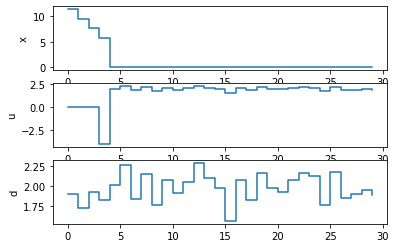

In [6]:
# Solve with single value of theta
theta_plot = sample_inventory(theta_bar, radius, n=1)

# Get optimal solution
result_plot = m.solve(theta_plot)

t = np.arange(0, T, 1)
fig, ax = plt.subplots(3, 1)
ax[0].step(t, x.value[:-1], where="post")
ax[0].set_ylabel('x')
ax[1].step(t, u.value, where="post")
ax[1].set_ylabel('u')
ax[2].step(t, theta_plot['d'][0], where="post")
ax[2].set_ylabel('d')
plt.show()

In [7]:
# Store values for plotting
df_plot = pd.DataFrame({'t': t,
                        'x': x.value[:-1],
                        'u': u.value,
                        'd': theta_plot['d'][0]})
df_plot.to_csv(output + "_plot.csv")